<a href="https://colab.research.google.com/github/sefayehalilova/ROIM/blob/master/bic_aic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from math import log
from sklearn.datasets import make_regression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score 


In [ ]:
# dataset,y = make_regression(100,100,10,noise=0.2,random_state=2)
# dataset,y = make_regression(100,100,10,noise=0.5,random_state=4)
dataset,y = make_regression(20,20,2,noise=0.5)
dataset = pd.DataFrame(dataset)

In [ ]:

# data and empty arrays for saving results.
indexes = []
scores_train = []
scores_test = []
AICS = []
BICS = []
MSE_train = []
MSE_test = []


In [ ]:

 
# calculate aic for regression
def calculate_aic(n, mse, num_params):
	aic = n*log(mse) + 2 * num_params
	return abs(aic)


# calculate bic for regression
def calculate_bic(n, mse, num_params):
	bic = n*log(mse) + num_params * log(n)
	return abs(bic)


In [ ]:
for i in range(1,len(dataset.columns)):
  X=dataset[dataset.columns[:i]] # declare X_data with i features.
  X_train, X_test, y_train, y_test = tts(X, y, test_size=0.5, random_state=4) # split dataset into train and test data
  LR = LinearRegression() # declaring of algorithtm.
  LR.fit(X_train,y_train) # fitting using train data.
  prediction_test = LR.predict(X_test) # prediction of test data
  prediction_train = LR.predict(X_train) # prediction of train data.
  mse_train = mean_squared_error(y_train, prediction_train)
  mse_test = mean_squared_error(y_test, prediction_test)
  aic = calculate_aic(len(y), mse_train, i)
  bic = calculate_bic(len(y), mse_train, i)
  AICS.append(mse_train + aic)
  BICS.append(mse_train + bic)
  MSE_test.append(mse_test)
  MSE_train.append(mse_train)
  indexes.append(i) 

In [ ]:
print(MSE_test)
print(MSE_train)
print(AICS)
print(BICS)

[2543.5200216869316, 2667.024966824115, 3764.4366911315474, 4575.462232706191, 0.714057511878936, 1.0069637526807025, 1.0234125832998129, 0.9524746971855089, 2.1034006888812207, 82.78228326488595, 1103.139227683334, 1205.5926935095324, 1408.6716855129039, 1647.4006415074077, 1628.0044619657913, 2290.2476692400473, 2232.750955182333, 2846.374795028508, 2763.6553101632826]
[2610.0263505194066, 2299.2154093818363, 1181.4950005508579, 673.9338731285779, 0.05588729459030865, 0.03278980117268305, 0.03211540254860791, 0.02741197224054594, 5.216658280136029e-27, 1.2759667369768821e-26, 3.393442955989226e-27, 1.712853683506383e-27, 1.874365065241333e-26, 1.1107950406417067e-27, 3.666073284833608e-27, 1.5729886450106975e-27, 2.411468901170111e-27, 8.589827510861075e-27, 3.045811676580957e-27]
[2769.368662444411, 2458.0218737291298, 1328.985717854371, 812.1965130288561, 47.744251551443085, 56.38554483719436, 54.80050607761165, 55.96292033092706, 1192.3588098032826, 1172.4701660292462, 1196.959049

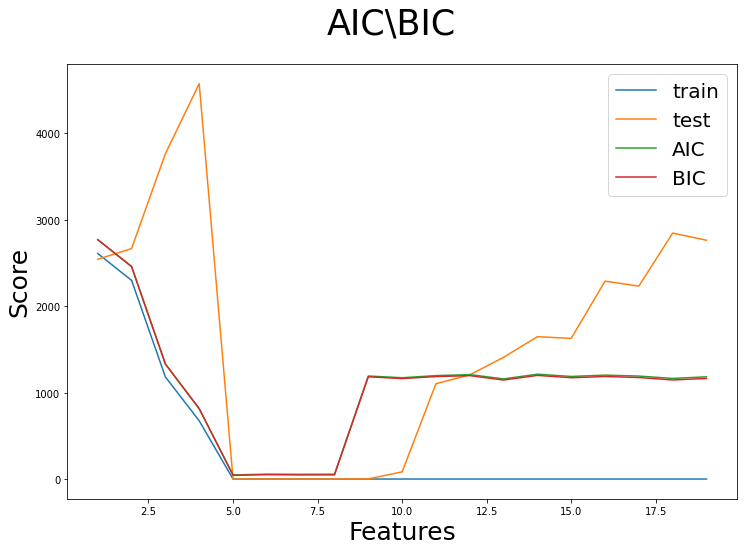

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(indexes, MSE_train)
plt.plot(indexes, MSE_test)
plt.plot(indexes, AICS)
plt.plot(indexes, BICS)
plt.legend(['train','test', 'AIC', 'BIC'], fontsize='20')
plt.suptitle('AIC\BIC', fontsize="35")
plt.xlabel('Features', fontsize="25")
plt.ylabel('Score', fontsize="25")
plt.show()
